outs/main_pipeline_images/extr_renders/im_000.png


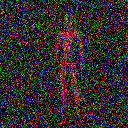

In [64]:
from PIL import Image
from diffusers.schedulers import DDIMScheduler
import torch
import torchvision.transforms.functional as TF
from torchvision import transforms
from pathlib import Path

scheduler = DDIMScheduler()


resolution = 128
normalize = transforms.Compose(
    [
        transforms.Resize((resolution, resolution)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

denormalize = transforms.Compose(
    [
        transforms.Normalize([-1], [2]),
        transforms.Lambda(lambda x: x.clamp(0, 1)),
        transforms.ToPILImage(),
    ]
)

frame = 0
folder = 'anim_renders'
folder = 'extr_renders'
path = Path("outs/main_pipeline_images/")
im_path = path / folder / f"im_{frame:03d}.png"

print(im_path)

im = normalize(Image.open(im_path))

t_initial = 0
t_start = 700
t_next = 800

t = t_next

noise = torch.randn_like(im)
noisy = scheduler.add_noise(im, noise, scheduler.timesteps[t])

noisy_pil = denormalize(noisy)
noisy_pil